In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-incidents/Police_Department_Incidents_-_Previous_Year__2016_.csv
/kaggle/input/san-francisco/san-francisco.geojson
/kaggle/input/survey-data/Topic_Survey_Assignment (1).csv


In [2]:
import folium
import matplotlib.pyplot as plt

<font color="blue" >
    Map(location=None, width='100%', height='100%', left='0%', top='0%', position='relative', tiles='OpenStreetMap', attr=None, min_zoom=0, max_zoom=18, zoom_start=10, min_lat=-90, max_lat=90, min_lon=-180, max_lon=180, max_bounds=False, crs='EPSG3857', control_scale=False, prefer_canvas=False, no_touch=False, disable_3d=False, png_enabled=False, zoom_control=True, **kwargs)
    
    
    
 |  
 |  Create a Map with Folium and Leaflet.js
    
 |  
 |  Generate a base map of given width and height with either default
 |  tilesets or a custom tileset URL. The following tilesets are built-in
 |  to Folium. Pass any of the following to the "tiles" keyword:
    
    
 |  
 |      - "OpenStreetMap"
 |      - "Mapbox Bright" (Limited levels of zoom for free tiles)
 |      - "Mapbox Control Room" (Limited levels of zoom for free tiles)
 |      - "Stamen" (Terrain, Toner, and Watercolor)
 |      - "Cloudmade" (Must pass API key)
 |      - "Mapbox" (Must pass API key)
 |      - "CartoDB" (positron and dark_matter)

In [3]:
world_map=folium.Map()
world_map
#Generating the world map is straigtforward in Folium.
#We simply create a Folium _Map_ object and then you display it

<font color="blue" >
    All locations on a map are defined by their respective Latitude and Longitude values. So we can create a map and pass in a center of Latitude and Longitude values of [0, 0].

<font color="blue" >
    We will visualize the immigration to Canadan in this dataset

In [4]:
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4,tiles='Stamen Toner')

# display Canada's map
world_map
#Here we create Stamen Toner map is high-contrast B+W (black and white) maps used for data mashups and exploring river meanders and coastal zones.

In [5]:
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4,tiles='Stamen Terrain')
world_map
#Here we create Stamen Terrain map with feature of hill shading and natural vegetation colors

In [6]:
df= pd.read_csv('../input/crime-incidents/Police_Department_Incidents_-_Previous_Year__2016_.csv')
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In this dataframe, each row consists of 13 features:

> 1.  **IncidntNum**: Incident Number
> 2.  **Category**: Category of crime or incident
> 3.  **Descript**: Description of the crime or incident
> 4.  **DayOfWeek**: The day of week on which the incident occurred
> 5.  **Date**: The Date on which the incident occurred
> 6.  **Time**: The time of day on which the incident occurred
> 7.  **PdDistrict**: The police department district
> 8.  **Resolution**: The resolution of the crime in terms whether the perpetrator was arrested or not
> 9.  **Address**: The closest address to where the incident took place
> 10. **X**: The longitude value of the crime location 
> 11. **Y**: The latitude value of the crime location
> 12. **Location**: A tuple of the latitude and the longitude values
> 13. **PdId**: The police department ID

In [7]:
df.shape
#We have 150 500 crimes in rows with 13 features in columns

(150500, 13)

In [8]:
# create map and display it
sanfrancisco_map = folium.Map(location=[37.77, -122.42], zoom_start=12)

sanfrancisco_map # display the map of San Francisco


Below we will superimpose the locations of the crimes onto the map. The way to do that in **Folium** is to create a _feature group_ with its own features and style and then add it to the San Francisco map

In [9]:
incidents = folium.map.FeatureGroup()
latitudes = list(df.iloc[:100,:].Y)
longitudes = list(df.iloc[:100,:].X)
labels = list(df.iloc[:100,:].Category)

# loop through the 100 crimes and add each to the incidents feature group
for lat, long, in zip(df.iloc[:100,:].Y, df.iloc[:100,:].X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, long],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            popup=labels,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfrancisco_map.add_child(incidents)
# Here we have pop up label that shows itself when we click on them

<font color="blue">
We can also added some pop-up text that would get displayed when you hover over a marker:

In [10]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfrancisco_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfrancisco_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df.iloc[:100,:].Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

NameError: name 'latitude' is not defined

# 3.Some Exercises with Matplotlib:

In [11]:
df2=pd.read_csv("../input/survey-data/Topic_Survey_Assignment (1).csv")
df2

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


Text(0.5, 1.0, "Percentage of Respondents' interest in Data science areas")

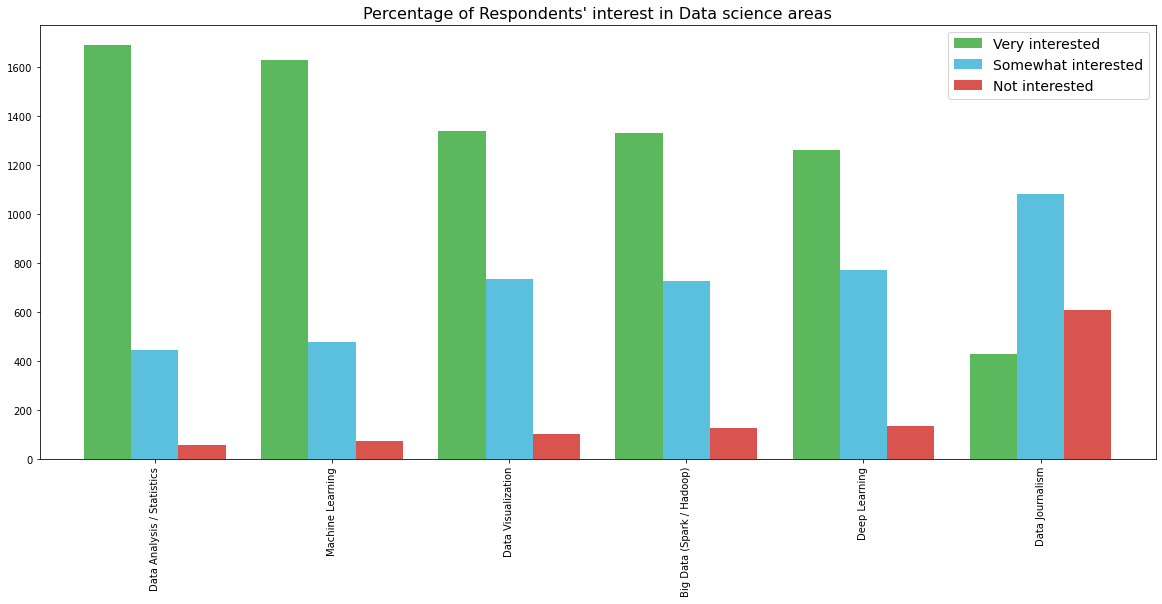

In [12]:
df2.sort_values(by="Very interested",ascending=False).plot(kind="bar", figsize=(20, 8), width=0.8,
                                                           color =['#5cb85c', '#5bc0de', '#d9534f'])
plt.legend(fontsize=14)
plt.title("Percentage of Respondents' interest in Data science areas", size=16)


In [13]:
san_francisco=df["PdDistrict"].value_counts().reset_index()

san_francisco

,index,PdDistrict
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [14]:
world_geo = r"../input/san-francisco/san-francisco.geojson"
world_geo

'../input/san-francisco/san-francisco.geojson'

In [15]:
world_map = folium.Map(location=[0, 0], zoom_start=2)

In [16]:
df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374
